In [39]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

In [3]:
pip install lxml

In [4]:
requests.get('https://www.ambitionbox.com/list-of-companies?page=2').text

'<HTML><HEAD>\n<TITLE>Access Denied</TITLE>\n</HEAD><BODY>\n<H1>Access Denied</H1>\n \nYou don\'t have permission to access "http&#58;&#47;&#47;www&#46;ambitionbox&#46;com&#47;list&#45;of&#45;companies&#63;" on this server.<P>\nReference&#32;&#35;18&#46;27f9da17&#46;1674464647&#46;c28faab\n</BODY>\n</HTML>\n'

In [5]:
 headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64), Applewebkit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.162'}
webpage=requests.get('https://www.ambitionbox.com/list-of-companies?page=2',headers=headers).text

In [6]:
soup=BeautifulSoup(webpage,'lxml')

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   List of companies - 778.1k companies | AmbitionBox
  </title>
  <meta content="2023 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-head="ssr" name="revisit-after"/>
  <meta content="AmbitionBox" data-n-head="ssr" name="application-name"/>
  <meta content="EN" data-n-head="ssr" name="content-language"/>
  <meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_id"/>
  <meta content="712617688793459" data-n-head="ssr" property="fb:app_id"/>
  <meta content="#ffffff" data-n-head="ssr" name="theme-color"/>
  <meta content="#ffffff" data-n-head="ssr" name="msapplication-navbutton-color"/
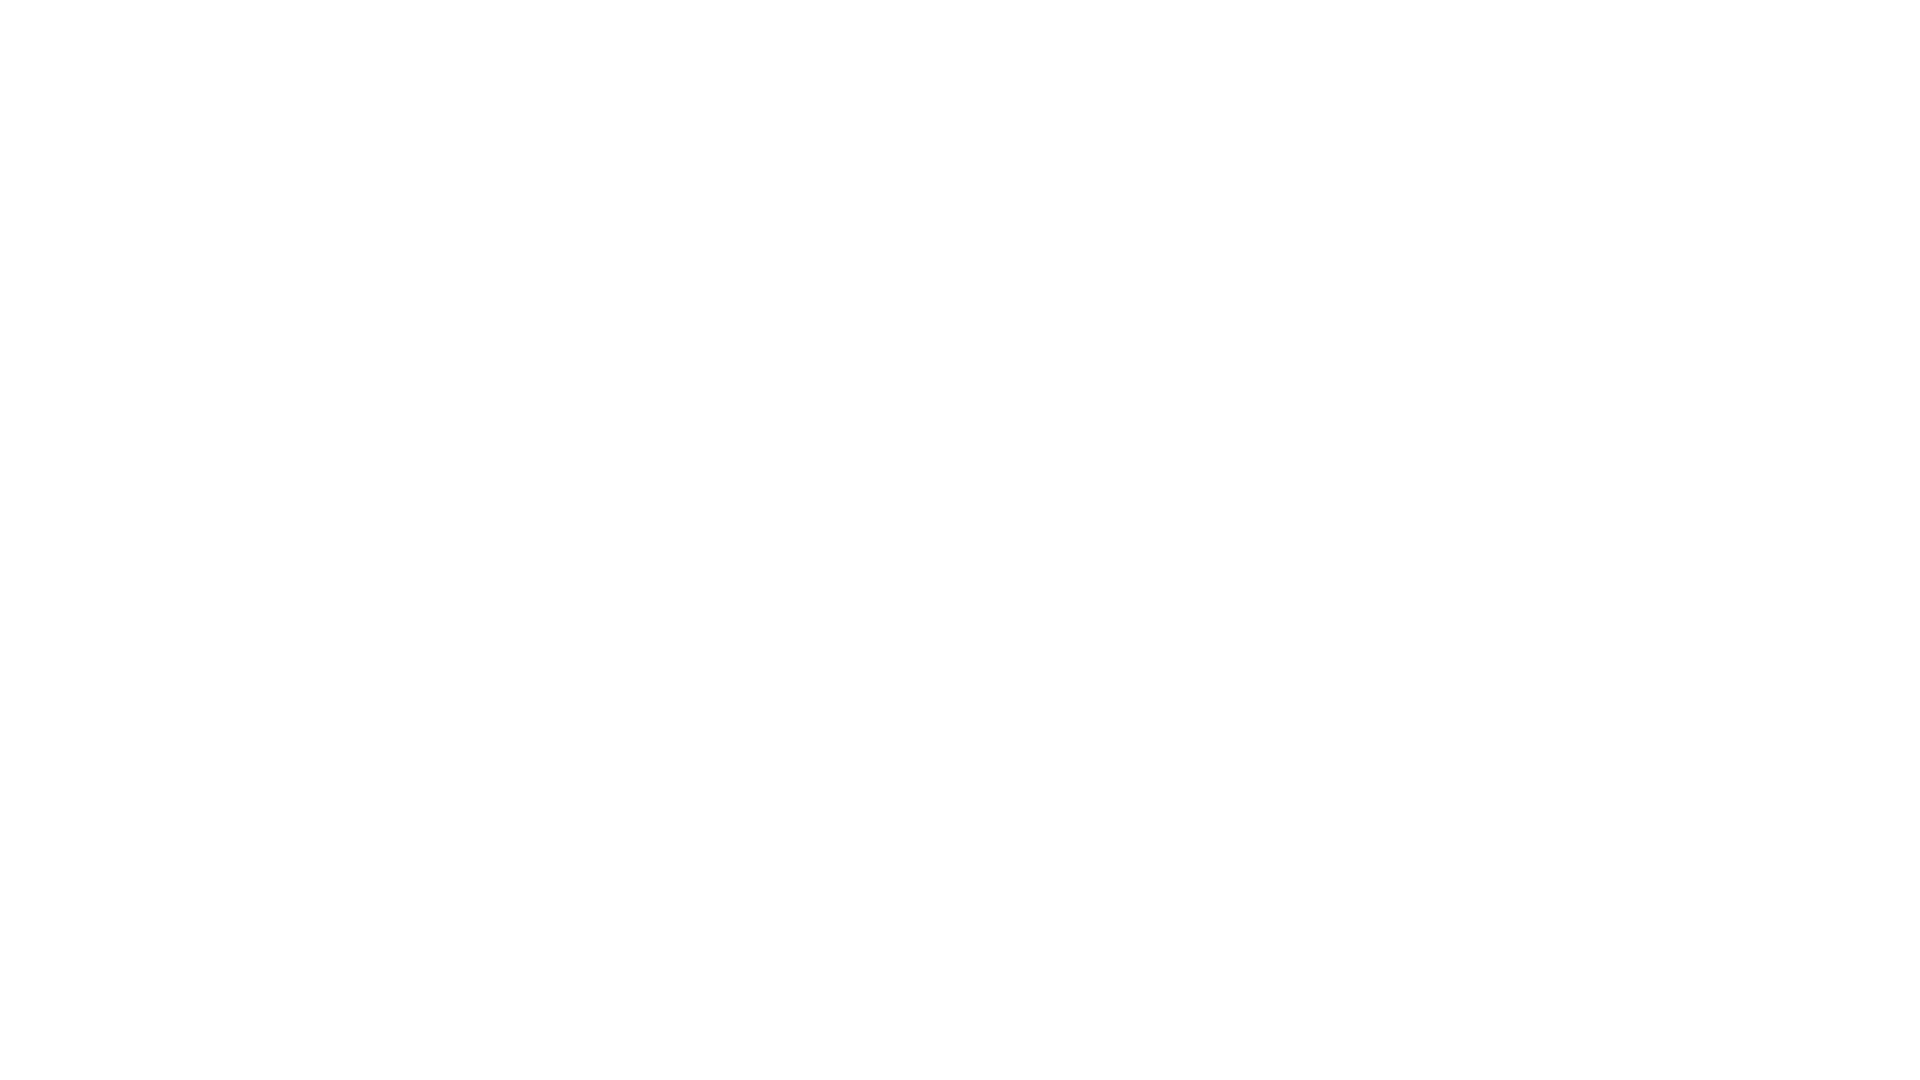

In [7]:
print(soup.prettify())

In [9]:
for i in soup.find_all('h2'):
    print(i.text.strip())

IndusInd Bank
Ernst & Young
DXC Technology
Hinduja Global S...
Infosys BPM
Maruti Suzuki
IDFC FIRST Bank
HSBC
Bajaj Finserv
Ericsson
Conneqt Business...
Mphasis
Startek
Dr. Reddy's
Sutherland Globa...
Cipla Pharmaceut...
Yes Bank
Udaan
Jana Small Finan...
Asian Paints
NTT DATA
ICICI Prudential...
HDFC Life
Lupin
HCL Group
PwC
EXL Service
iEnergizer
Indian Army
L&T Infotech


In [10]:
for i in soup.find_all('p'):
    print(i.text.strip())

AmbitionBox
Discover Best Places to work in India
AmbitionBox
Discover best places to work
Compare & find best workplace
Read reviews for 6L+ companies
Rate your former or current company
Discover salaries for 6L+ companies
Calculate your take home salary
Check your market value
Help other jobseekers
Read interviews for 40K+ companies
Interviews questions for 1K+ colleges
Contribute your interview questions
Discover Best Places to Work!
Company reviews. Salaries. Interviews. Jobs.
About Company
7,78,066 unique
			companies found
Sort By:
Popular
3.8
Public
Gurgaon/Gurugram,Haryana + 564 more
29 years old
10k-50k Employees (India)
IndusInd Bank is a Mumbai based scheduled private bank founded in Mumbai in April 1994. This bank offers a wide range of banking as well as financial products and services to the customers and is headquartered in Mumbai, Maharashtra. The bank has over 745 branches with a total network of over 1635 operating ATMs. It has two representative offices outside India

In [15]:
len(soup.find_all('p',class_='rating'))


30

In [17]:
len(soup.find_all('a',class_='review-count'))

30

In [18]:
company=soup.find_all('div',class_='company-content-wrapper')

In [19]:
len(company)

30

In [43]:

name=[]
rating=[]
reviews=[]
ctype=[]
hq=[]
old=[]
employees=[]

for i in company:
    reviews.append(i.find('a',class_='review-count').text.strip())
    name.append(i.find('h2').text.strip())
    rating.append(i.find('p',class_='rating').text.strip())
    ctype.append(i.find_all('p',class_='infoEntity')[0].text.strip())
    hq.append(i.find_all('p',class_='infoEntity')[1].text.strip())
    try:
        old.append(i.find_all('p',class_='infoEntity')[2].text.strip())
    except:
        old.append(np.nan)
    try:    
        employees.append(i.find_all('p',class_='infoEntity')[3].text.strip())
    except:
        employees.append(np.nan)
        
d={'name':name,'rating':rating,'reviews':reviews,'type':ctype,'hq':hq,'old':old,'employees':employees}

df=pd.DataFrame(d)

In [41]:
company[0].find_all('p',class_='infoEntity')[1].text.strip()

'Gurgaon/Gurugram,Haryana + 564 more'

In [44]:
df

,name,rating,reviews,type,hq,old,employees
0,IndusInd Bank,3.8,(6.7k Reviews),Public,"Gurgaon/Gurugram,Haryana + 564 more",29 years old,10k-50k Employees (India)
1,Ernst & Young,3.8,(6.3k Reviews),Private,London + 72 more,34 years old,10k-50k Employees (India)
2,DXC Technology,3.9,(7k Reviews),Public,"Minato,Tokyo + 56 more",6 years old,10k-50k Employees (India)
3,Hinduja Global S...,4.0,(6k Reviews),Public,"Bangalore/Bengaluru,Karnataka + 72 more",23 years old,10k-50k Employees (India)
4,Infosys BPM,3.9,(5.8k Reviews),"Bangalore/Bengaluru,Karnataka + 48 more",21 years old,10k-50k Employees (India),NaN
5,Maruti Suzuki,4.2,(5.8k Reviews),Public,"New Delhi,Delhi + 370 more",40 years old,10k-50k Employees (India)
6,IDFC FIRST Bank,4.0,(5.4k Reviews),Public,"Mumbai,Maharashtra + 411 more",5 years old,10k-50k Employees (India)
7,HSBC,4.1,(5.8k Reviews),Private,"Pune,Maharashtra + 52 more",21 years old,1k-5k Employees (India)
8,Bajaj Finserv,4.0,(5.2k Reviews),Public,"Pune,Maharashtra + 681 more",16 years old,10k-50k Employees (India)
9,Ericsson,4.3,(5.4k Reviews),Private,"Stockholm,Stockholm County + 129 more",147 years old,10k-50k Employees (India)


In [61]:
final=pd.DataFrame()

for j in range(1,333):
    
    url='https://www.ambitionbox.com/list-of-companies?page={}'.format(j)
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64), Applewebkit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.162'}
    webpage=requests.get(url,headers=headers).text
    
    soup=BeautifulSoup(webpage,'lxml')
    
    company=soup.find_all('div',class_='company-content-wrapper')
   
    name=[]
    rating=[]
    reviews=[]
    ctype=[]
    hq=[]
    old=[]
    employees=[]

    for i in company:
        try:
            reviews.append(i.find('a',class_='review-count').text.strip())
        except:
            reviews.append(np.nan)
        try:
            name.append(i.find('h2').text.strip())
        except:
            name.append(np.nan)
        try:
            rating.append(i.find('p',class_='rating').text.strip())
        except:
            rating.append(np.nan)
        try:
            ctype.append(i.find_all('p',class_='infoEntity')[0].text.strip())
        except:
            ctype.append(np.nan)
        try:
            hq.append(i.find_all('p',class_='infoEntity')[1].text.strip())
        except:
            hq.append(np.nan)
        try:
            old.append(i.find_all('p',class_='infoEntity')[2].text.strip())
        except:
            old.append(np.nan)
        try:    
            employees.append(i.find_all('p',class_='infoEntity')[3].text.strip())
        except:
            employees.append(np.nan)

    d={'name':name,'rating':rating,'reviews':reviews,'type':ctype,'hq':hq,'old':old,'employees':employees}

    df=pd.DataFrame(d)
    
    final=final.append(df,ignore_index=True)
     

C:\Users\nishant\AppData\Local\Temp\ipykernel_13124\2098882294.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final=final.append(df,ignore_index=True)


In [62]:
final.shape

(9959, 7)

In [64]:
final.to_csv('ambition_box.csv')

In [65]:
final

,name,rating,reviews,type,hq,old,employees
0,TCS,3.9,(50.9k Reviews),Public,"Mumbai,Maharashtra + 270 more",55 years old,1 Lakh+ Employees (India)
1,Accenture,4.1,(32.5k Reviews),Public,Dublin + 131 more,34 years old,1 Lakh+ Employees (India)
2,Cognizant,3.9,(29.9k Reviews),Private,Teaneck. New Jersey. + 101 more,29 years old,1 Lakh+ Employees (India)
3,ICICI Bank,4.0,(33.8k Reviews),Public,"Mumbai,Maharashtra + 1057 more",29 years old,1 Lakh+ Employees (India)
4,HDFC Bank,4.0,(39.6k Reviews),Public,"Mumbai,Maharashtra + 1257 more",29 years old,50k-1 Lakh Employees (India)
...,...,...,...,...,...,...,...
9954,Ministry Of Educ...,4.7,(51 Reviews),Malé + 3 more,NaN,NaN,NaN
9955,Lomos Enterprise...,4.7,(51 Reviews),"Bengaluru,Karnataka + 3 more",5 years old,51-200 Employees (India),NaN
9956,LifeWorks,4.0,(51 Reviews),Gurgaon/Gurugram + 3 more,1k-5k Employees (India),NaN,NaN
9957,Meddo,3.4,(51 Reviews),Private,"Gurgaon,Haryana + 4 more",5 years old,11-50 Employees (India)
